# Script

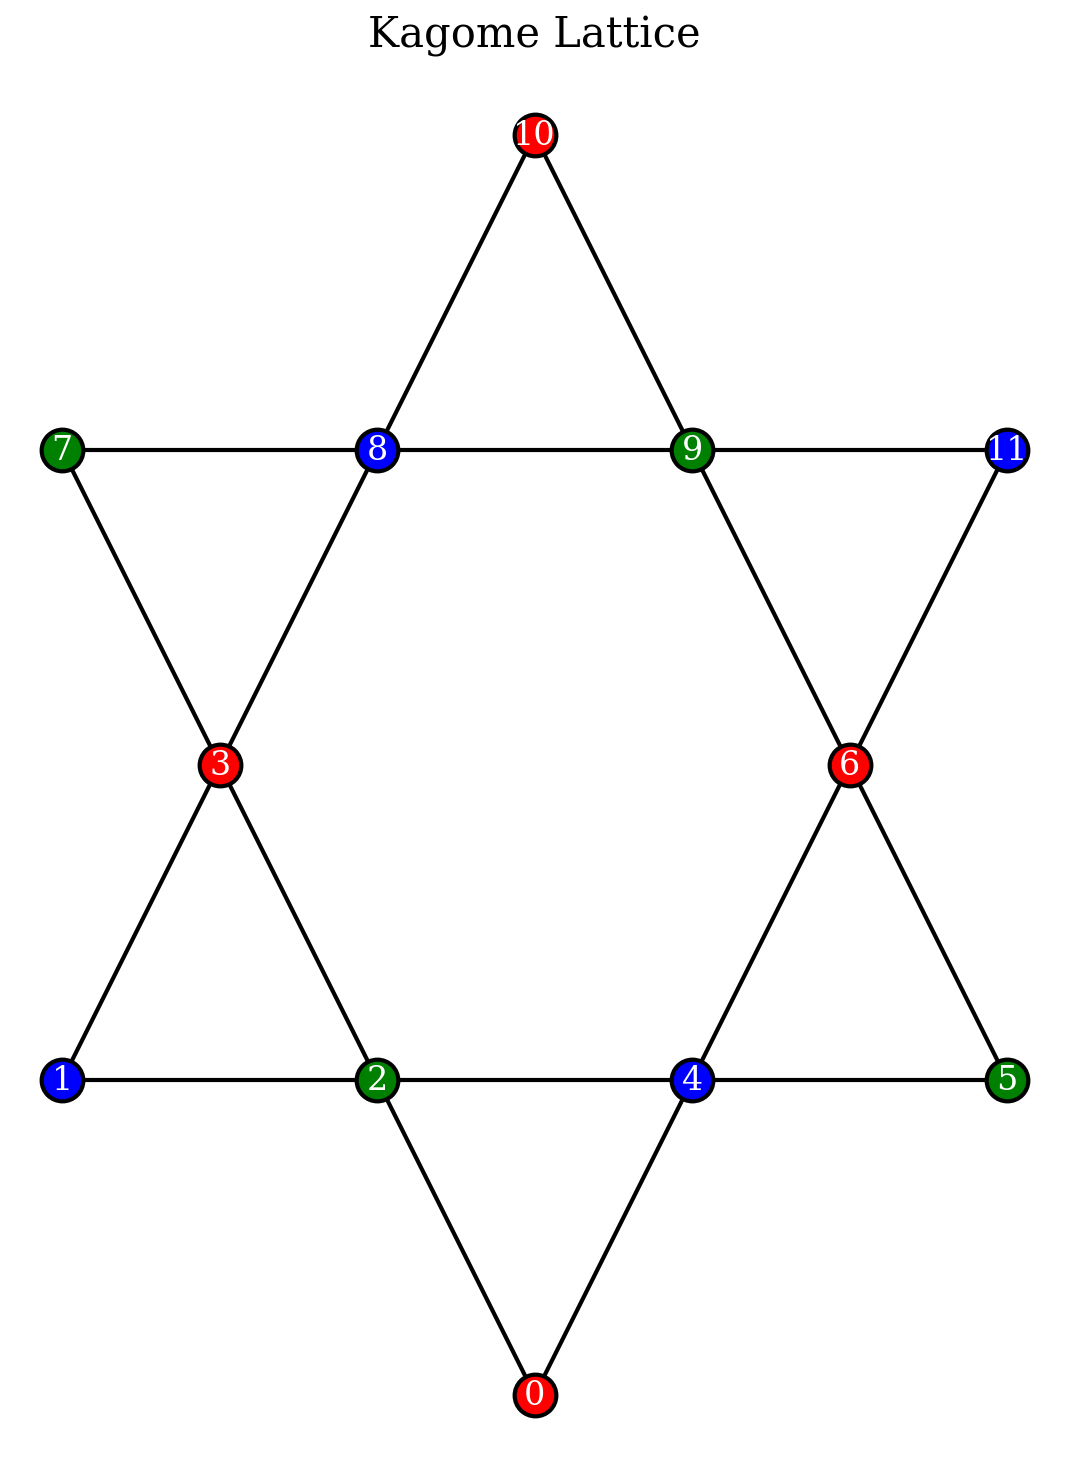

In [40]:
from main import *
row_layout = [{'num_cells': 1, 'shift': 0.0}, 
             {'num_cells': 2, 'shift': -0.5}, 
             {'num_cells': 3, 'shift': -1}]
sp = [0,1,9,11,16,17]
ham = interp_ham(row_layout, sp, 0.35 * np.pi)
ham.lattice.plot()

In [41]:
ge, gs = ground(ham)
ge

Residual: 7.01e-01 for eigenvalue estimate: -2.547670
Residual: 5.06e-01 for eigenvalue estimate: -2.844675
Residual: 3.85e-01 for eigenvalue estimate: -2.992712
Residual: 3.21e-01 for eigenvalue estimate: -3.087338
Residual: 2.50e-01 for eigenvalue estimate: -3.149155
Residual: 1.89e-01 for eigenvalue estimate: -3.185774
Residual: 1.41e-01 for eigenvalue estimate: -3.206374
Residual: 1.41e-01 for eigenvalue estimate: -3.206374
Residual: 8.03e-02 for eigenvalue estimate: -3.213028
Residual: 6.00e-02 for eigenvalue estimate: -3.218287
Residual: 4.74e-02 for eigenvalue estimate: -3.222934
Residual: 3.89e-02 for eigenvalue estimate: -3.226636
Residual: 3.29e-02 for eigenvalue estimate: -3.229663
Residual: 2.78e-02 for eigenvalue estimate: -3.232438
Residual: 2.96e-02 for eigenvalue estimate: -3.235255
Residual: 2.34e-02 for eigenvalue estimate: -3.235650
Residual: 1.98e-02 for eigenvalue estimate: -3.236366
Residual: 1.66e-02 for eigenvalue estimate: -3.237174
Residual: 1.44e-02 for eigen

np.float64(-3.2402151138885507)

# State prep

## 12 qubits

In [1]:
from main import *
from qaravan.core import brickwall_skeleton, two_local_circ
from qaravan.tensorQ import environment_state_prep

row_layout = [{'num_cells': 1, 'shift': 0.0}, 
             {'num_cells': 2, 'shift': -0.5}, 
             {'num_cells': 3, 'shift': -1}]
sp = [0,1,9,11,16,17]
ham = interp_ham(row_layout, sp, 0.35 * np.pi)

ge, gs = ground(ham, quiet=True)
ge

-3.2402151138885493

In [43]:
gates_per_layer = 5
num_instances = 5
best_cost = []
worst_cost = []
for num_layers in [4,8,12,16,20,24]:
    geom_skeleton = geometric_skeleton(ham.lattice, gates_per_layer, num_layers)
    cost_against_instance = []
    for _ in range(num_instances):
        circ, cost_list = environment_state_prep(geom_skeleton, gs, num_steps=1000, stop_ratio=1e-6, progress_interval=200)
        cost_against_instance.append(cost_list[-1])
    
    best_cost.append(1-max(cost_against_instance))
    worst_cost.append(1-min(cost_against_instance))

TypeError: environment_state_prep() got an unexpected keyword argument 'num_steps'

In [ ]:
plt.plot([4, 8, 12, 16, 20, 24], best_cost, label='Best cost')
plt.plot([4, 8, 12, 16, 20, 24], worst_cost, label='Worst cost')
plt.yscale('log')
plt.xlabel('Number of layers')
plt.ylabel('Cost')
plt.legend()

## 6 qubits

In [ ]:
from main import *
from qaravan.core import set_style
import matplotlib.pyplot as plt

row_layout = [{'num_cells': 2, 'shift': -0.5}, 
             {'num_cells': 1, 'shift': 0.0}]
sp = [0,4,8]
ham = interp_ham(row_layout, sp, 0.35 * np.pi)
ge, gs = ground(ham, quiet=True)

In [ ]:
infidelity_convs = []
infidelity_circs = []
for num_layers in [1,2,3,4,5]: 
    geom_skeleton = geometric_skeleton(ham.lattice, 5, num_layers)
    context = RunContext(
        progress_interval=100,
        max_iter=10000,
        checkpoint_file="checkpoint.pickle",
        checkpoint_interval=500,
        resume=False,
        convergence_check=True,
        stop_ratio=1e-8
    )   

    circ, cost_list = environment_state_prep(gs, skeleton=geom_skeleton, context=context)
    infidelity_convs.append(cost_list)
    infidelity_circs.append(circ)

Step 0 at 2025-05-05T11:00:00 with cost 0.48915850999035815
[Checkpoint saved at step 0]
Plateau detected with cost 0.2207795702701134 at step 6
Step 0 at 2025-05-05T11:00:00 with cost 0.1556324750213769
[Checkpoint saved at step 0]
Plateau detected with cost 0.13700337762116133 at step 15
Step 0 at 2025-05-05T11:00:00 with cost 0.08563764233385995
[Checkpoint saved at step 0]
Step 100 at 2025-05-05T11:00:00 with cost 0.016265485054707707
Plateau detected with cost 0.016264236608755755 at step 177
Step 0 at 2025-05-05T11:00:01 with cost 0.06318981886748154
[Checkpoint saved at step 0]
Step 100 at 2025-05-05T11:00:01 with cost 0.0032228830115164087
Step 200 at 2025-05-05T11:00:01 with cost 0.0029527571749634607
Step 300 at 2025-05-05T11:00:02 with cost 0.0029097319903048646
Step 400 at 2025-05-05T11:00:02 with cost 0.00290707254445155
Step 500 at 2025-05-05T11:00:02 with cost 0.002906801584341312
[Checkpoint saved at step 500]
Plateau detected with cost 0.002906797347795642 at step 506


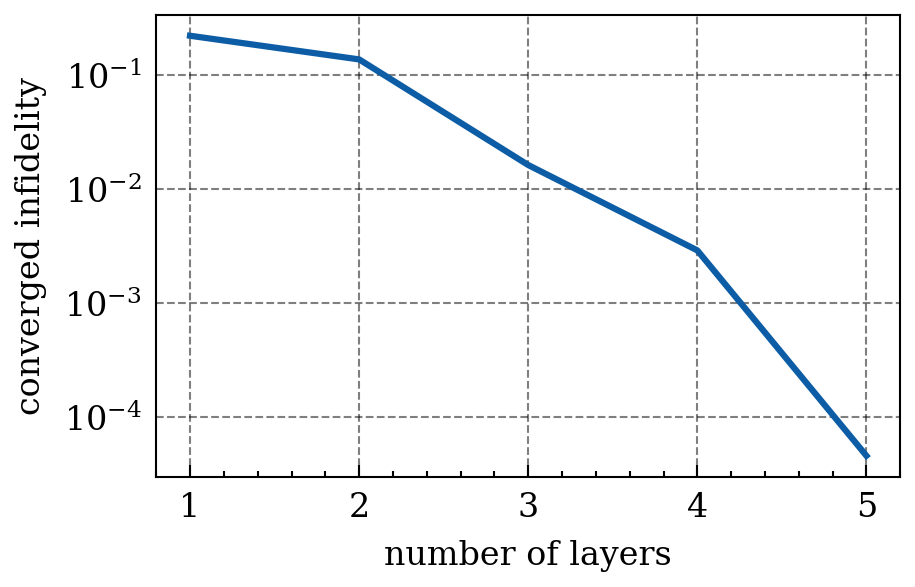

In [ ]:
set_style() 

fig, ax = plt.subplots(figsize=(3.2,2))
ax.plot([1,2,3,4,5], [infidelity[-1] for infidelity in infidelity_convs], label='Convergence')
ax.set_xlabel('number of layers')
ax.set_ylabel('converged infidelity')
ax.set_yscale("log")

## 24 qubits

In [3]:
from main import *

row_layout = [{'num_cells': 3, 'shift': 0.0}, 
             {'num_cells': 4, 'shift': -0.5}, 
             {'num_cells': 3, 'shift': 0.0}, 
             {'num_cells': 2, 'shift': 0.5}]
sp = [0,1,6,7,9,11,30,32,34,35,19,20]
ham = interp_ham(row_layout, sp, 0.35 * np.pi)

In [4]:
ge, gs = ground(ham, quiet=False, ncv=20)

Residual: 7.79e-01 for eigenvalue estimate: -5.754822
Residual: 6.66e-01 for eigenvalue estimate: -5.960018
Residual: 5.70e-01 for eigenvalue estimate: -6.107988
Residual: 4.90e-01 for eigenvalue estimate: -6.215886
Residual: 4.21e-01 for eigenvalue estimate: -6.294995
Residual: 3.64e-01 for eigenvalue estimate: -6.353382
Residual: 3.19e-01 for eigenvalue estimate: -6.397374
Residual: 2.81e-01 for eigenvalue estimate: -6.431309
Residual: 2.50e-01 for eigenvalue estimate: -6.457887
Residual: 2.25e-01 for eigenvalue estimate: -6.479057
Residual: 2.04e-01 for eigenvalue estimate: -6.496333
Residual: 1.86e-01 for eigenvalue estimate: -6.510640
Residual: 1.68e-01 for eigenvalue estimate: -6.522404
Residual: 1.68e-01 for eigenvalue estimate: -6.522404
Residual: 9.69e-02 for eigenvalue estimate: -6.527102
Residual: 7.49e-02 for eigenvalue estimate: -6.530860
Residual: 6.30e-02 for eigenvalue estimate: -6.534462
Residual: 5.52e-02 for eigenvalue estimate: -6.537969
Residual: 4.93e-02 for eigen

In [5]:
ge

-6.582419969124355

In [6]:
gs.shape 

(16777216,)

In [7]:
2**24

16777216

In [ ]:
with open("gs24.pickle", 'wb') as f: 
    pickle.dump(gs, f)

In [ ]:
A = [16, 17, 18]
B = [9, 10, 11]
C = [6, 7, 8]
top_entropy(gs, [A,B,C])

np.float64(-0.08470933343414444)

## 30 qubits

In [ ]:
from main import * 

row_layout = [{'num_cells': 3, 'shift': 0.0}, 
             {'num_cells': 4, 'shift': -0.5}, 
             {'num_cells': 3, 'shift': 0.0}, 
             {'num_cells': 2, 'shift': 0.5}]
sp = [0,7,9,19,32,35]
ham = interp_ham(row_layout, sp, 0.35 * np.pi)

In [ ]:
len(edge_matching(ham.lattice.nn_pairs, 5))

10

# Comparing infidelity and energy minimization for 6 qubits

In [1]:
from min_energy import *
import matplotlib.pyplot as plt

True ground state energy: -1.2724335124317754


In [2]:
row_layout = [{'num_cells': 2, 'shift': -0.5}, 
             {'num_cells': 1, 'shift': 0.0}]
sp = [0,4,8]
ham = interp_ham(row_layout, sp, 0.35 * np.pi)
grouped_terms = [(indices, torch.tensor(mat, dtype=torch.complex128)) for indices, mat in ham.grouped_terms()]

true_ge, true_gs = ground(ham, quiet=True)
true_entropy = vN_entropy(rdm_from_sv(true_gs, [0,2,4])).real
print(f"True ground state energy: {true_ge}")
print(f"True ground state entropy: {true_entropy}")

True ground state energy: -1.2724335124317754
True ground state entropy: 1.3595072585619774


## Infidelity minimization

In [8]:
num_instances = 5
num_layers_opts = [3,4,5,6]

In [25]:
infidelities = []
energy_errs = []
entropy_errs = []

for num_layers in num_layers_opts:
    print(num_layers)
    skeleton = geometric_skeleton(ham.lattice, 5, num_layers)
    infs = []
    engs = []
    ents = []
    for _ in range(num_instances):
        context = RunContext(progress_interval=500, max_iter=10000, convergence_check=True, stop_ratio=1e-6, resume=False)
        circ, cost_list = environment_state_prep(target_sv=true_gs, skeleton=skeleton, context=context)
        infs.append(cost_list[-1])

        eng = circuit_energy(circ, grouped_terms).item()
        energy_err = abs(eng - true_ge) / abs(true_ge)
        engs.append(energy_err)

        sv = StatevectorSim(circ).run(progress_bar=False).reshape(2**circ.num_sites)
        ent = vN_entropy(rdm_from_sv(sv, [0,2,4])).real
        entropy_err = abs(ent - true_entropy) / abs(true_entropy)
        ents.append(entropy_err)

    infidelities.append(infs)
    energy_errs.append(engs)
    entropy_errs.append(ents)
    print("")

3
Step 0 at 2025-05-18T12:29:32 with cost 0.12363798578889629
Plateau detected with cost 0.016267171651192847 at step 138
Step 0 at 2025-05-18T12:29:32 with cost 0.10690640185913747
Plateau detected with cost 0.02429857504308619 at step 21
Step 0 at 2025-05-18T12:29:32 with cost 0.09629631479349499
Plateau detected with cost 0.024298492236233038 at step 24
Step 0 at 2025-05-18T12:29:33 with cost 0.09194727470715747
Plateau detected with cost 0.0242985792445658 at step 21
Step 0 at 2025-05-18T12:29:33 with cost 0.11172094153380596
Plateau detected with cost 0.01626523357954246 at step 65

4
Step 0 at 2025-05-18T12:29:33 with cost 0.06084034267565308
Plateau detected with cost 0.006979840285233685 at step 229
Step 0 at 2025-05-18T12:29:34 with cost 0.07813968909975078
Step 500 at 2025-05-18T12:29:35 with cost 0.00013645461115641133
Step 1000 at 2025-05-18T12:29:37 with cost 0.00012205254308006452
Plateau detected with cost 0.00012153548590176921 at step 1216
Step 0 at 2025-05-18T12:29:38

In [189]:
#with open("infid_min_6.pickle", "wb") as f: 
#    pickle.dump([infidelities, energy_errs, entropy_errs], f)

with open("infid_min_6.pickle", "rb") as f: 
    infidelities, energy_errs, entropy_errs = pickle.load(f)

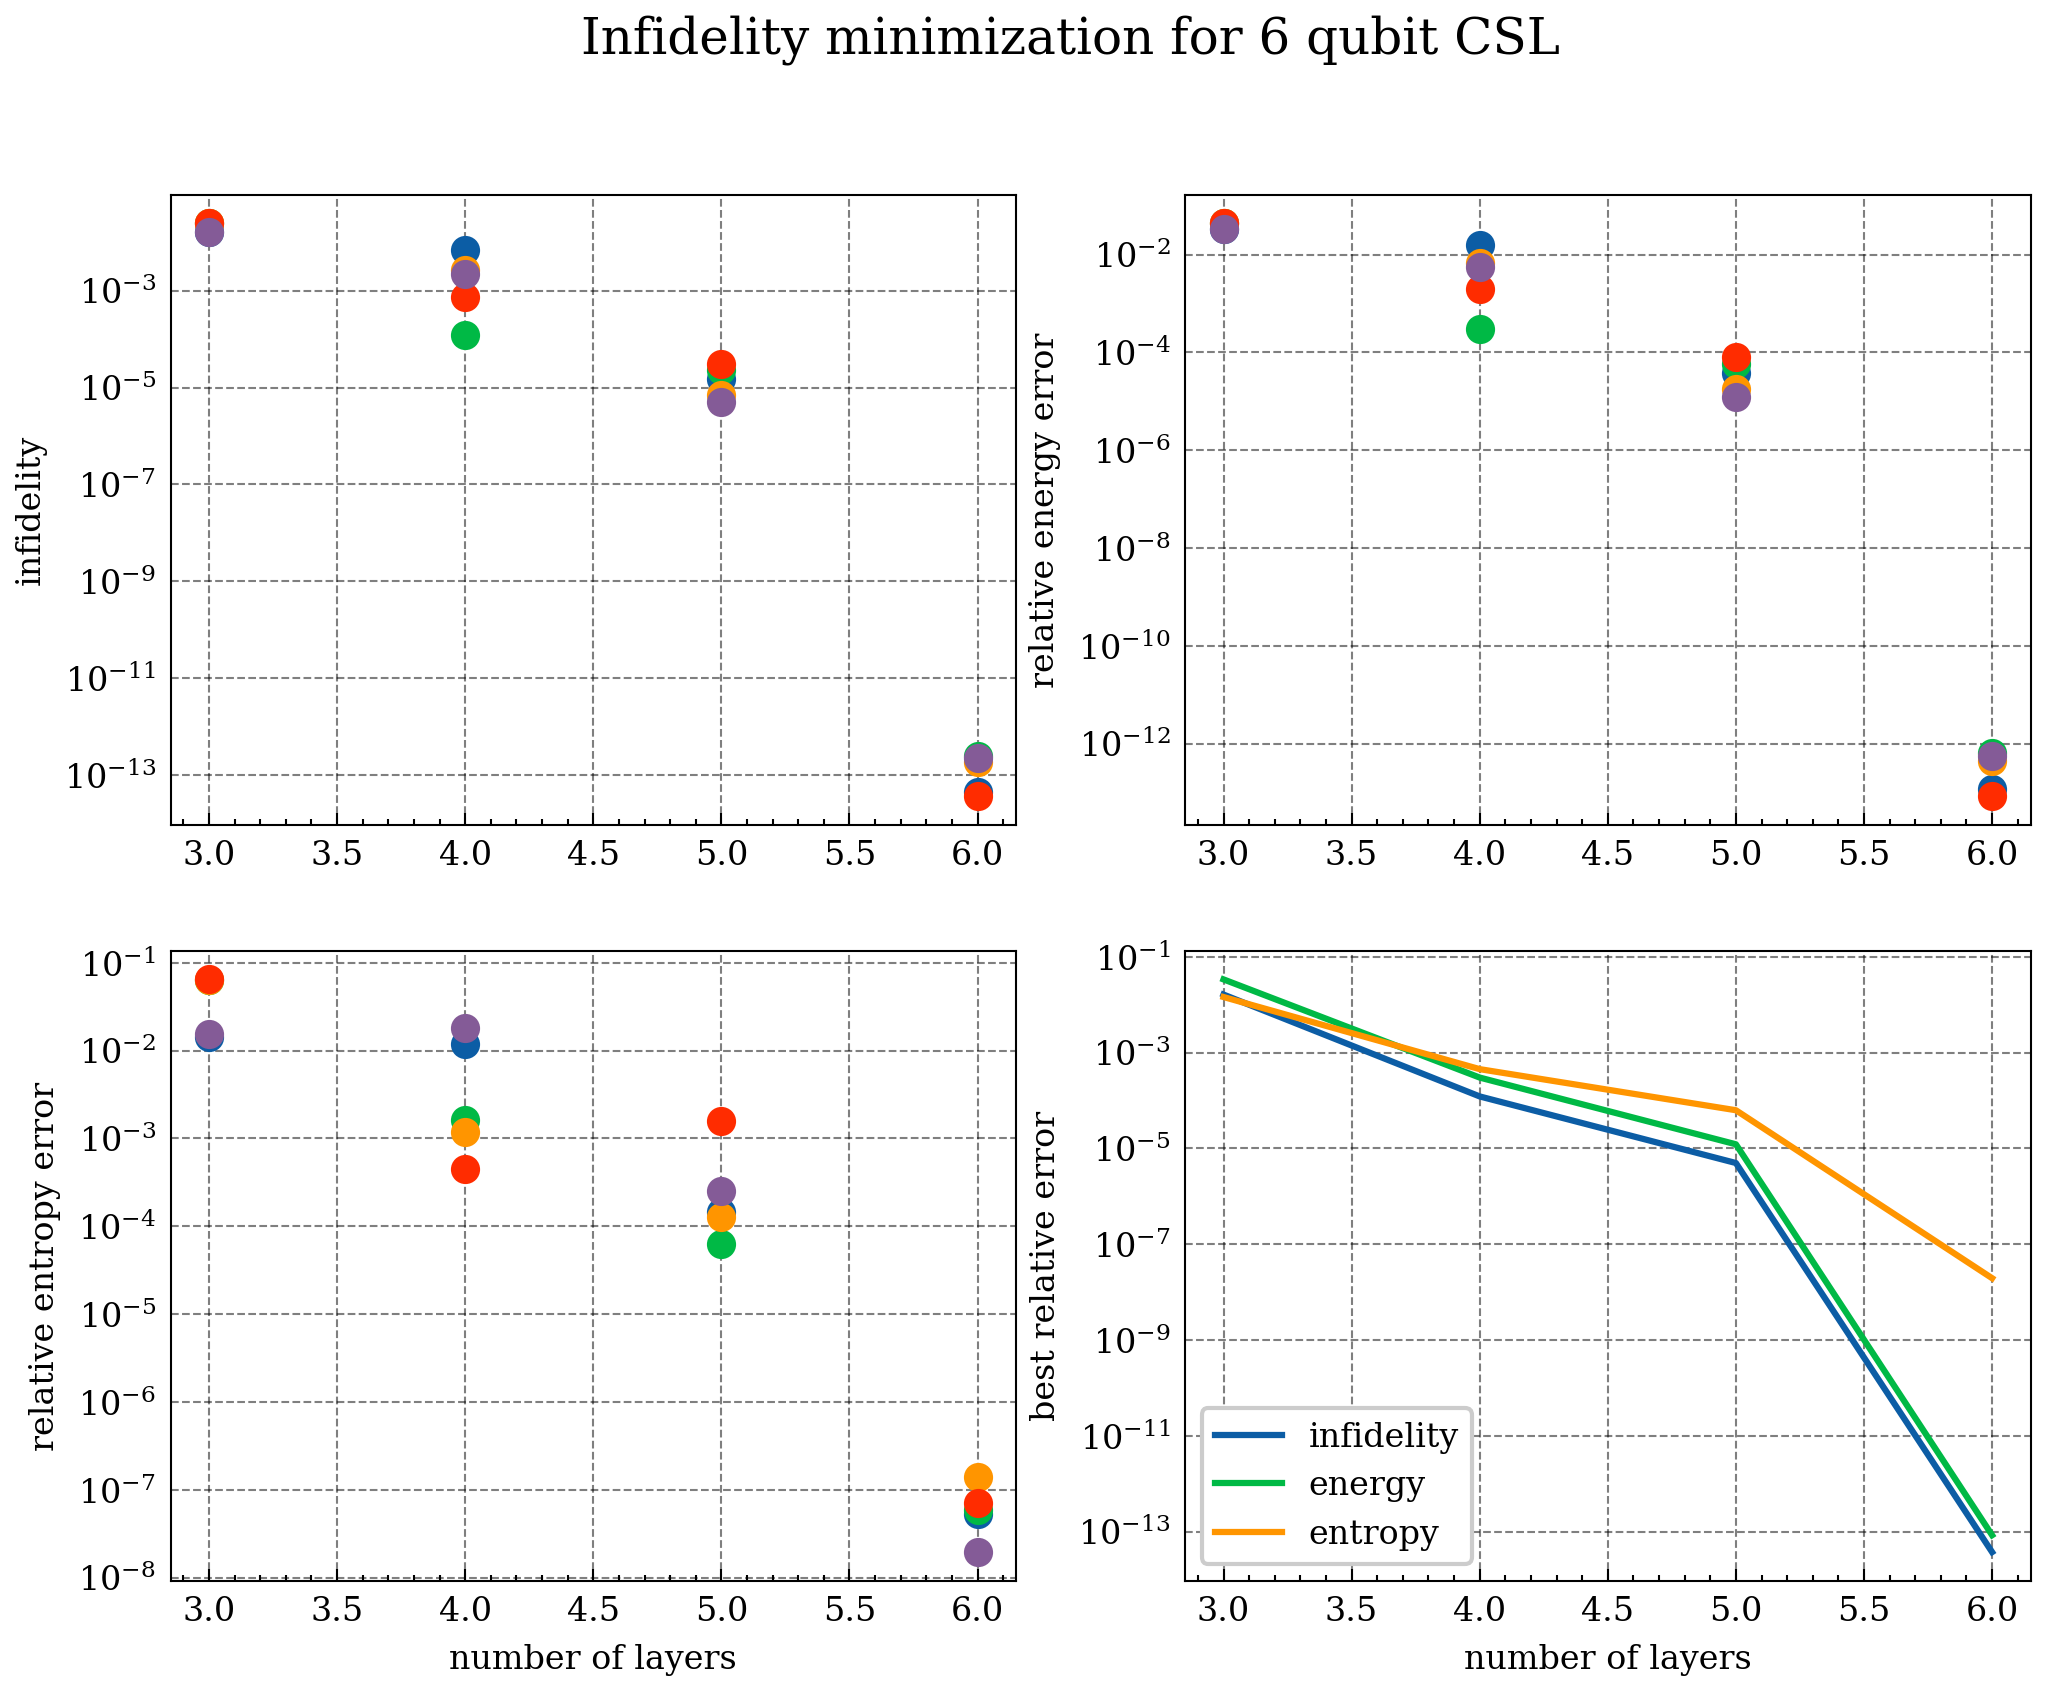

In [190]:
# 2 by 2 subplot
set_style()
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

for i in range(num_instances): 
    axs[0,0].scatter(num_layers_opts, [inf[i] for inf in infidelities])
    axs[0,1].scatter(num_layers_opts, [eng[i] for eng in energy_errs])
    axs[1,0].scatter(num_layers_opts, [ent[i] for ent in entropy_errs])

inf_means = [np.min(inf) for inf in infidelities]
energy_means = [np.min(eng) for eng in energy_errs]
entropy_means = [np.min(ent) for ent in entropy_errs]
axs[1,1].plot(num_layers_opts, inf_means, label='infidelity')
axs[1,1].plot(num_layers_opts, energy_means, label='energy')
axs[1,1].plot(num_layers_opts, entropy_means, label='entropy')
axs[1,1].legend()

axs[0,0].set_ylabel('infidelity')
axs[0,1].set_ylabel('relative energy error')
axs[1,0].set_ylabel('relative entropy error')
axs[1,1].set_ylabel('best relative error')

axs[1,1].set_xlabel('number of layers')
axs[1,0].set_xlabel('number of layers')

axs[0,0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[1,0].set_yscale('log')
axs[1,1].set_yscale('log')

fig.suptitle("Infidelity minimization for 6 qubit CSL")
plt.savefig("infid_min_6.pdf", bbox_inches='tight')

## Energy minimization

In [46]:
from min_energy import *

Text(0.5, 1.0, 'depth=5, LR=1e-2, automatic LR reduction, gamma=0.1')

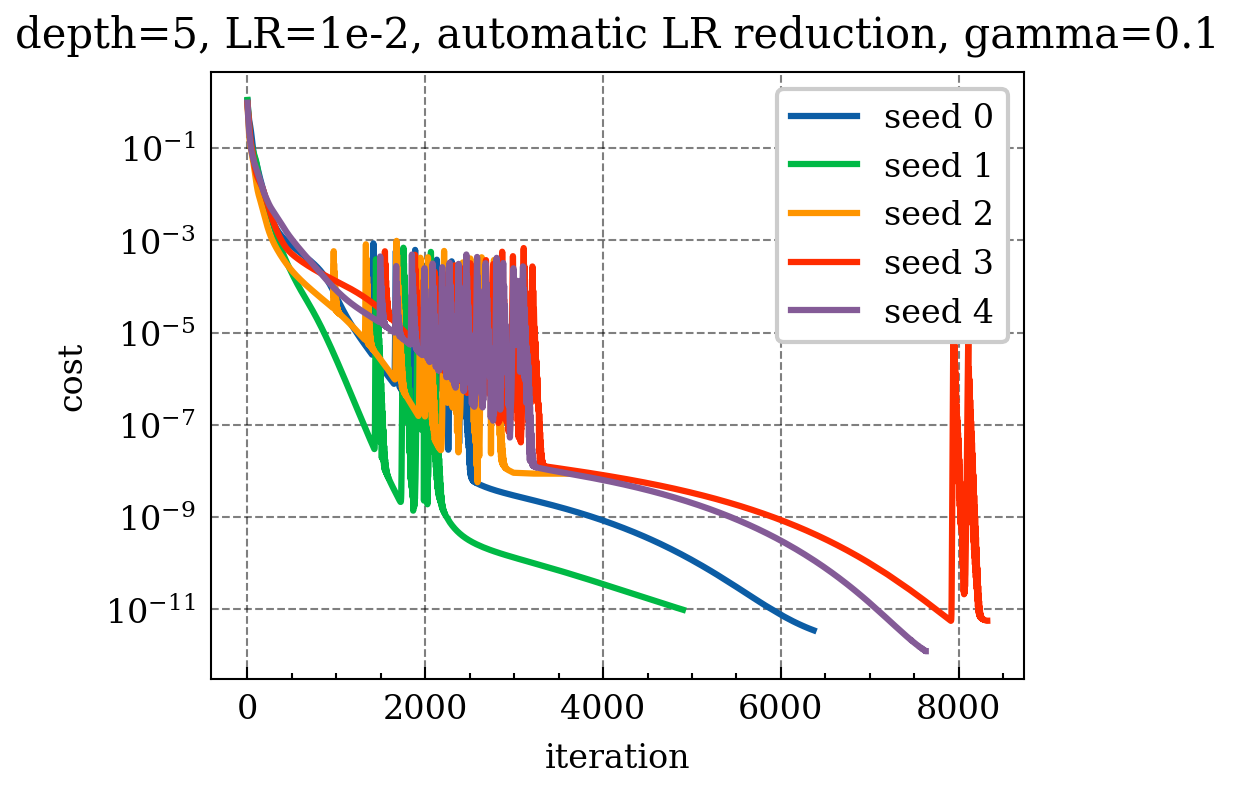

In [181]:
cost_data = []
params_data = []
for i in range(5): 
    with open(f"results_{i}.pickle", "rb") as f:
        cost_list, params = pickle.load(f)
        cost_data.append(cost_list)
        params_data.append(params)

for i in range(5):
    plt.plot(cost_data[i], label=f"seed {i}")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.legend()
plt.yscale("log")
plt.title("depth=5, LR=1e-2, automatic LR reduction, gamma=0.1")
#plt.savefig("n6d5.pdf", bbox_inches='tight')

In [183]:
engs6 = []
ents6 = []

skeleton = geometric_skeleton(ham.lattice, 6, 6)
for params in params_data: 
    circ = two_local_circ(skeleton, params)
    sv = StatevectorSim(circ).run(progress_bar=False).reshape(2**circ.num_sites)
    ent = vN_entropy(rdm_from_sv(sv, [0,2,4])).real

    eng_err = abs(circuit_energy(circ, grouped_terms).item() - true_ge) / abs(true_ge)
    engs6.append(eng_err)

    ent_err = abs(ent - true_entropy) / abs(true_entropy)
    ents6.append(ent_err)

engs6, ents6


([3.5202670877413136e-12,
  9.833469025990718e-12,
  8.766734389813115e-09,
  5.668759051468625e-12,
  1.240024682768541e-12],
 [1.6703181354290018e-07,
  5.949722843550156e-07,
  5.9253932333143496e-06,
  2.4738924846477123e-07,
  2.634909129709415e-08])

In [184]:
#energy_errs = [engs3, engs4, engs5, engs6]
#entropy_errs = [ents3, ents4, ents5, ents6]

#with open("energy_min_6.pickle", "wb") as f: 
#    pickle.dump([energy_errs, entropy_errs], f)

with open("energy_min_6.pickle", "rb") as f: 
    energy_errs, entropy_errs = pickle.load(f)

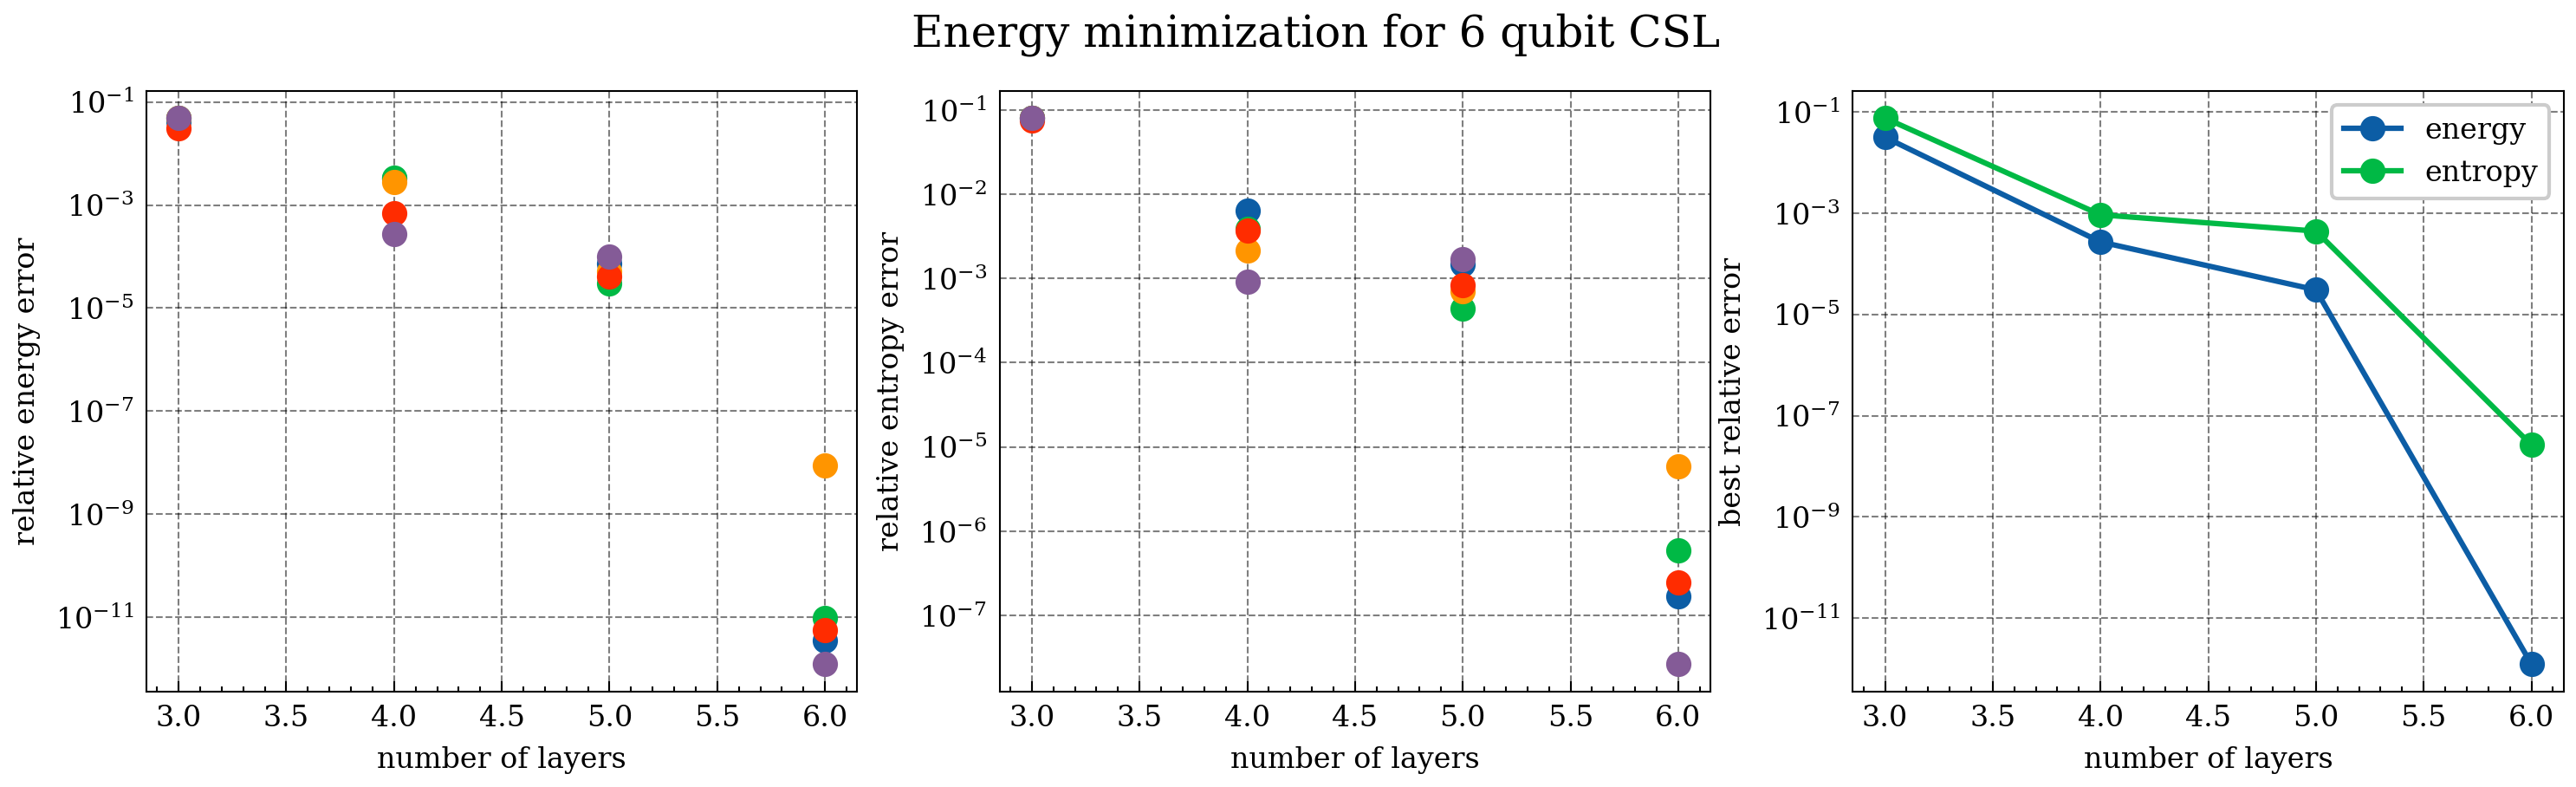

In [188]:
set_style()
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
num_layer_opts = [3, 4, 5, 6]

for i in range(num_instances): 
    axs[0].scatter(num_layer_opts, [eng[i] for eng in energy_errs])
    axs[1].scatter(num_layer_opts, [ent[i] for ent in entropy_errs])
    
energy_best = [np.min(eng) for eng in energy_errs]
entropy_best = [np.min(ent) for ent in entropy_errs]
axs[2].plot(num_layers_opts, energy_best, '-o', label='energy')
axs[2].plot(num_layers_opts, entropy_best, '-o', label='entropy')

axs[0].set_ylabel('relative energy error')
axs[1].set_ylabel('relative entropy error')
axs[2].set_ylabel('best relative error')

axs[2].legend()
axs[0].set_xlabel('number of layers')
axs[1].set_xlabel('number of layers')
axs[2].set_xlabel('number of layers')

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[2].set_yscale('log')

fig.suptitle("Energy minimization for 6 qubit CSL")
plt.savefig("energy_min_6.pdf", bbox_inches='tight')

# Comparing infidelity and energy minimization for 12 qubits

In [192]:
from min_energy import *
import matplotlib.pyplot as plt

In [196]:
row_layout = [{'num_cells': 1, 'shift': 0.0}, 
             {'num_cells': 2, 'shift': -0.5}, 
             {'num_cells': 3, 'shift': -1}]
sp = [0,1,9,11,16,17]
ham = interp_ham(row_layout, sp, 0.35 * np.pi)

grouped_terms = [(indices, torch.tensor(mat, dtype=torch.complex128)) for indices, mat in ham.grouped_terms()]

true_ge, true_gs = ground(ham, quiet=True)
true_entropy = top_entropy(true_gs, [[1,2,3],[4,5,6],[8,9,10]]).real
print(f"True ground state energy: {true_ge}")
print(f"True ground state entropy: {true_entropy}")

True ground state energy: -3.2402151138885538
True ground state entropy: -0.23334192030127276


## Infidelity minimization

In [199]:
num_instances = 5
num_layers_opts = [4,8,12,16,20,24,28]

In [200]:
infidelities = []
energy_errs = []
entropy_errs = []

for num_layers in num_layers_opts:
    print(num_layers)
    skeleton = geometric_skeleton(ham.lattice, 5, num_layers)
    infs = []
    engs = []
    ents = []
    for _ in range(num_instances):
        context = RunContext(progress_interval=500, max_iter=40000, convergence_check=True, stop_ratio=1e-6, resume=False)
        circ, cost_list = environment_state_prep(target_sv=true_gs, skeleton=skeleton, context=context)
        infs.append(cost_list[-1])

        eng = circuit_energy(circ, grouped_terms).item()
        energy_err = abs(eng - true_ge) / abs(true_ge)
        engs.append(energy_err)

        sv = StatevectorSim(circ).run(progress_bar=False).reshape(2**circ.num_sites)
        ent = top_entropy(sv, [[1,2,3],[4,5,6],[8,9,10]]).real
        entropy_err = abs(ent - true_entropy) / abs(true_entropy)
        ents.append(entropy_err)

    infidelities.append(infs)
    energy_errs.append(engs)
    entropy_errs.append(ents)
    print("")

4
Step 0 at 2025-05-19T16:01:22 with cost 0.28863343468235136
Plateau detected with cost 0.23259571538222545 at step 59
Step 0 at 2025-05-19T16:01:23 with cost 0.3395229664348095
Plateau detected with cost 0.2332707729323431 at step 60
Step 0 at 2025-05-19T16:01:24 with cost 0.4204743871778118
Plateau detected with cost 0.2315065665475915 at step 52
Step 0 at 2025-05-19T16:01:26 with cost 0.41503604796804217
Plateau detected with cost 0.23160952622321607 at step 35
Step 0 at 2025-05-19T16:01:26 with cost 0.4969304318705767
Plateau detected with cost 0.2309138234372996 at step 93

8
Step 0 at 2025-05-19T16:01:28 with cost 0.5484453646628681
Plateau detected with cost 0.04652045416322603 at step 353
Step 0 at 2025-05-19T16:01:37 with cost 0.4691433097372619
Plateau detected with cost 0.039301077403483875 at step 167
Step 0 at 2025-05-19T16:01:41 with cost 0.5212431685223063
Plateau detected with cost 0.07169361646945471 at step 178
Step 0 at 2025-05-19T16:01:46 with cost 0.54281954571966

In [201]:
with open("infid_min_12.pickle", "wb") as f: 
    pickle.dump([infidelities, energy_errs, entropy_errs], f)

with open("infid_min_12.pickle", "rb") as f: 
    infidelities, energy_errs, entropy_errs = pickle.load(f)

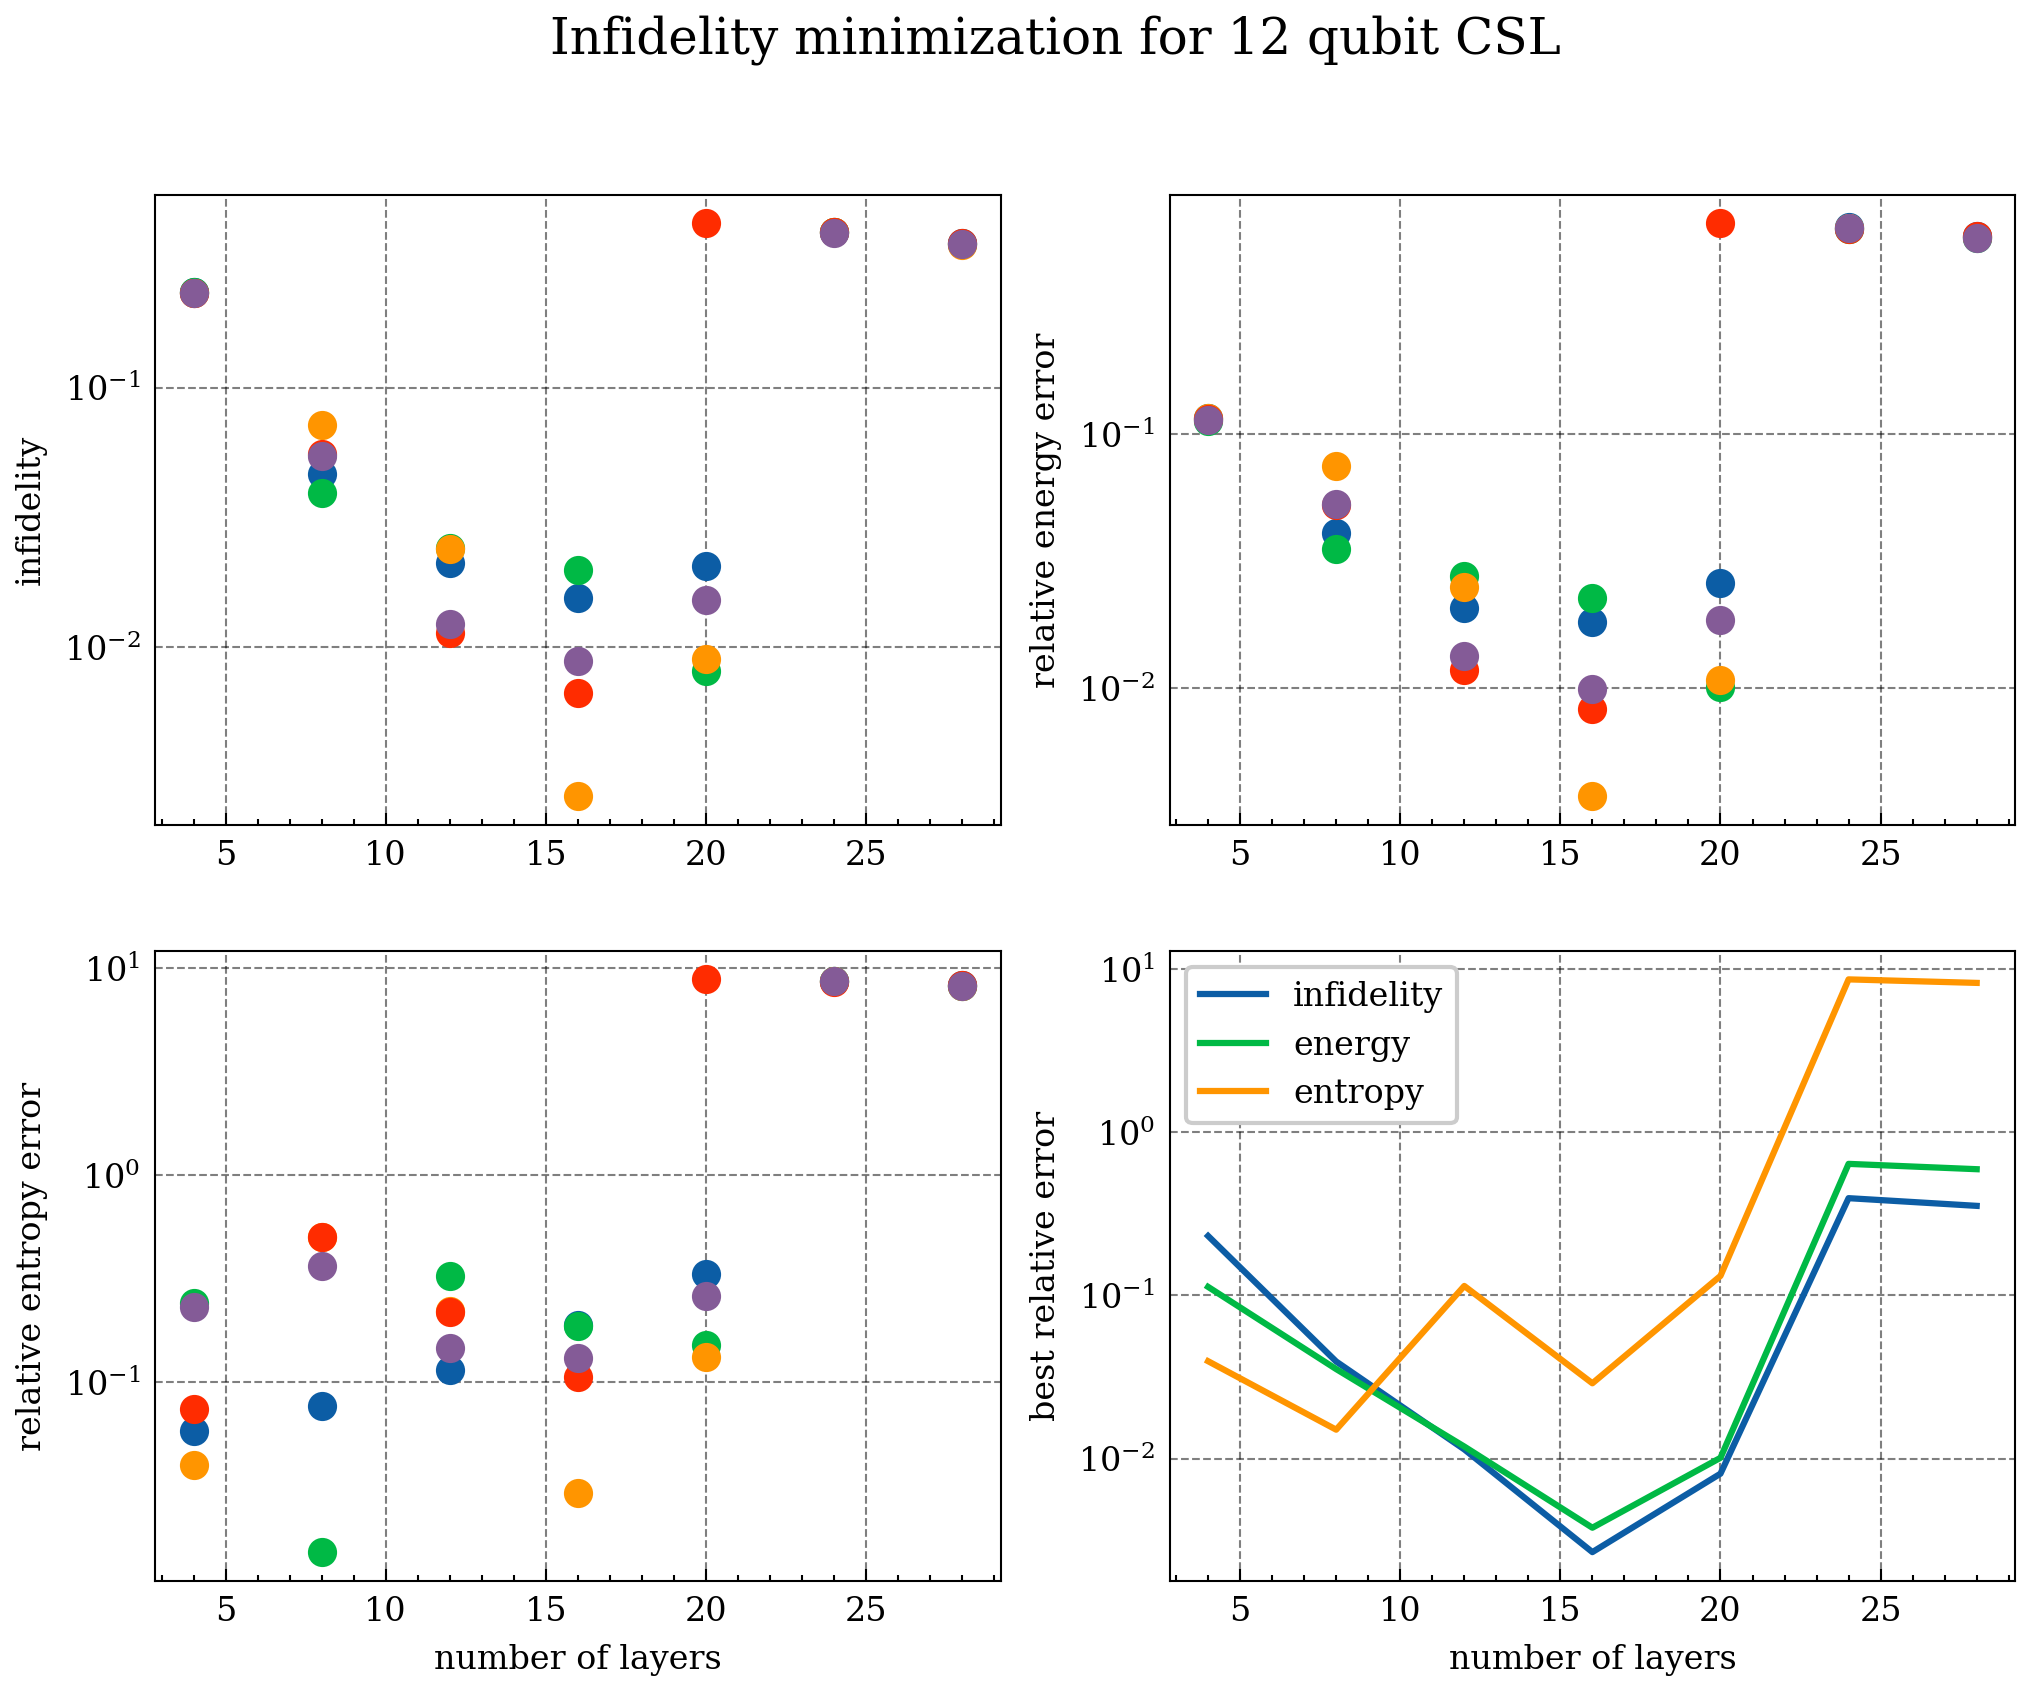

In [202]:
# 2 by 2 subplot
set_style()
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

for i in range(num_instances): 
    axs[0,0].scatter(num_layers_opts, [inf[i] for inf in infidelities])
    axs[0,1].scatter(num_layers_opts, [eng[i] for eng in energy_errs])
    axs[1,0].scatter(num_layers_opts, [ent[i] for ent in entropy_errs])

inf_means = [np.min(inf) for inf in infidelities]
energy_means = [np.min(eng) for eng in energy_errs]
entropy_means = [np.min(ent) for ent in entropy_errs]
axs[1,1].plot(num_layers_opts, inf_means, label='infidelity')
axs[1,1].plot(num_layers_opts, energy_means, label='energy')
axs[1,1].plot(num_layers_opts, entropy_means, label='entropy')
axs[1,1].legend()

axs[0,0].set_ylabel('infidelity')
axs[0,1].set_ylabel('relative energy error')
axs[1,0].set_ylabel('relative entropy error')
axs[1,1].set_ylabel('best relative error')

axs[1,1].set_xlabel('number of layers')
axs[1,0].set_xlabel('number of layers')

axs[0,0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[1,0].set_yscale('log')
axs[1,1].set_yscale('log')

fig.suptitle("Infidelity minimization for 12 qubit CSL")
plt.savefig("infid_min_12.pdf", bbox_inches='tight')

## Energy minimization

In [ ]:
from min_energy import *

In [ ]:
cost_data = []
params_data = []
for i in range(5): 
    with open(f"results_{i}.pickle", "rb") as f:
        cost_list, params = pickle.load(f)
        cost_data.append(cost_list)
        params_data.append(params)

for i in range(5):
    plt.plot(cost_data[i], label=f"seed {i}")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.legend()
plt.yscale("log")
plt.title("depth=5, LR=1e-2, automatic LR reduction, gamma=0.1")
#plt.savefig("n6d5.pdf", bbox_inches='tight')

# TEE is non-zero for 1D models

In [ ]:
from qaravan.core import * 
from qaravan.tensorQ import * 

In [ ]:
ham = XY(8)
_, gstate = ham.ground()

A = [0,1]
B = [2,3,4]
C = [5,6]
regions = [A, B, C]
print(top_entropy(gstate, regions))

0.029132153208173528


# Progress report

In [ ]:
from main import *
row_layout = [{'num_cells': 1, 'shift': 0.0}, 
             {'num_cells': 2, 'shift': -0.5}, 
             {'num_cells': 3, 'shift': -1}]
sp = []
ham = interp_ham(row_layout, sp, 0.35 * np.pi)

ge, gs = ground(ham, ncv=10)
ge

Residual: 1.01e+00 for eigenvalue estimate: -3.273642
Residual: 8.76e-01 for eigenvalue estimate: -3.778566
Residual: 7.70e-01 for eigenvalue estimate: -4.142414
Residual: 6.62e-01 for eigenvalue estimate: -4.412025
Residual: 5.40e-01 for eigenvalue estimate: -4.598694
Residual: 4.09e-01 for eigenvalue estimate: -4.714214
Residual: 3.07e-01 for eigenvalue estimate: -4.778371
Residual: 3.07e-01 for eigenvalue estimate: -4.778371
Residual: 1.80e-01 for eigenvalue estimate: -4.799740
Residual: 1.41e-01 for eigenvalue estimate: -4.817403
Residual: 1.18e-01 for eigenvalue estimate: -4.834453
Residual: 1.01e-01 for eigenvalue estimate: -4.850169
Residual: 1.18e-01 for eigenvalue estimate: -4.872569
Residual: 9.00e-02 for eigenvalue estimate: -4.876738
Residual: 7.53e-02 for eigenvalue estimate: -4.883041
Residual: 6.54e-02 for eigenvalue estimate: -4.888810
Residual: 5.88e-02 for eigenvalue estimate: -4.894626
Residual: 5.25e-02 for eigenvalue estimate: -4.900867
Residual: 4.86e-02 for eigen

np.float64(-4.945673773302447)

# Thin strip, periodic y

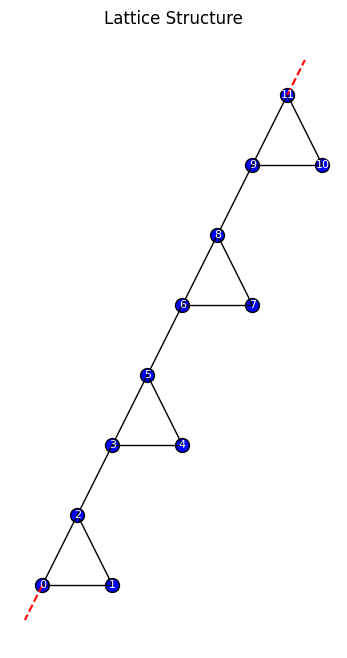

In [ ]:
afm_ham = interp_ham(2, 8, 0)
half_ham = interp_ham(2, 8, 0.35 * np.pi)
csl_ham = interp_ham(2, 8, np.pi/2)

csl_ham.lattice.plot()

In [ ]:
energy_a, gstate_a = afm_ham.ground()
energy_h, gstate_h = half_ham.ground()
energy_c, gstate_c = csl_ham.ground()

In [ ]:
A = [0,1,2]
B = [3,4,5]
C = [6,7,8]

tee_a = top_entropy(gstate_a, [A,B,C])
tee_h = top_entropy(gstate_h, [A,B,C])
tee_c = top_entropy(gstate_c, [A,B,C])

print("At theta = 0, topological entropy = ", tee_a, " and quantum dimensions is ", np.exp(-tee_a))
print("At theta = 0.35 pi, topological entropy = ", tee_h, " and quantum dimensions is ", np.exp(-tee_h))
print("At theta = pi/2, topological entropy = ", tee_c, " and quantum dimensions is ", np.exp(-tee_c))

At theta = 0, topological entropy =  -0.11847910900454695  and quantum dimensions is  1.1257833551213658
At theta = 0.35 pi, topological entropy =  -7.55045678694638e-05  and quantum dimensions is  1.0000755074184111
At theta = pi/2, topological entropy =  1.864158181722055e-15  and quantum dimensions is  0.9999999999999981


# 2D lattice 

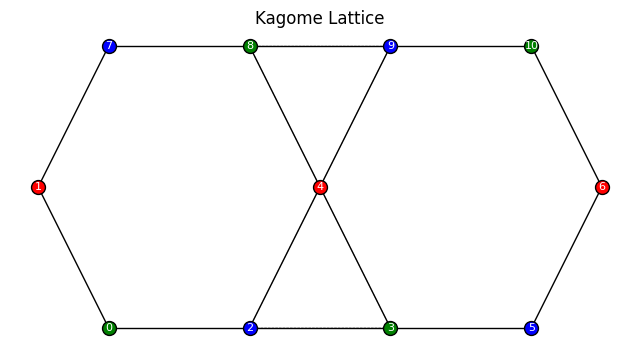

In [ ]:
row_layout = [{'num_cells': 3, 'shift': 0.0}, 
             {'num_cells': 2, 'shift': 0.5}]
sp = [0,7,11,14]
ham = interp_ham(row_layout, sp, 0.35 * np.pi)
ham.lattice.plot()

In [ ]:
ge, gs = ham.ground()

In [ ]:
ge

array([-2.51160724])

In [ ]:
len(ham.lattice.nn_pairs)

14

In [ ]:
ham.lattice.triangle_terms

{(2, 3, 4), (4, 9, 8)}

In [ ]:
ham.terms[40]

(np.float64(0.4539904997395468), (4, 8), ['z', 'z'])

In [ ]:
len(ham.terms), 14*3 + 12

(54, 54)

In [ ]:
ge 

array([-12.15657315])

In [ ]:
energy_a, gstate_a = afm_ham.ground()
energy_h, gstate_h = half_ham.ground()
energy_c, gstate_c = csl_ham.ground()

In [ ]:
A = [0,1,2]
B = [3,4,5]
C = [6,7,8]

tee_a = top_entropy(gstate_a, [A,B,C])
tee_h = top_entropy(gstate_h, [A,B,C])
tee_c = top_entropy(gstate_c, [A,B,C])

print("At theta = 0, topological entropy = ", tee_a, " and quantum dimensions is ", np.exp(-tee_a))
print("At theta = 0.35 pi, topological entropy = ", tee_h, " and quantum dimensions is ", np.exp(-tee_h))
print("At theta = pi/2, topological entropy = ", tee_c, " and quantum dimensions is ", np.exp(-tee_c))

At theta = 0, topological entropy =  -0.13144561856915726  and quantum dimensions is  1.1404758853254675
At theta = 0.35 pi, topological entropy =  -0.5038964667736064  and quantum dimensions is  1.6551579904388816
At theta = pi/2, topological entropy =  -0.2930568616631657  and quantum dimensions is  1.3405190124051574


In [ ]:
import numpy as np
tee = -0.35677694103454805
print("At theta = 0.35 pi, topological entropy = ", tee, " and quantum dimensions is ", np.exp(-tee))

At theta = 0.35 pi, topological entropy =  -0.35677694103454805  and quantum dimensions is  1.4287171461395662
